<a href="https://colab.research.google.com/github/ardyansyah5711/PCVK_Genap_2021/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd

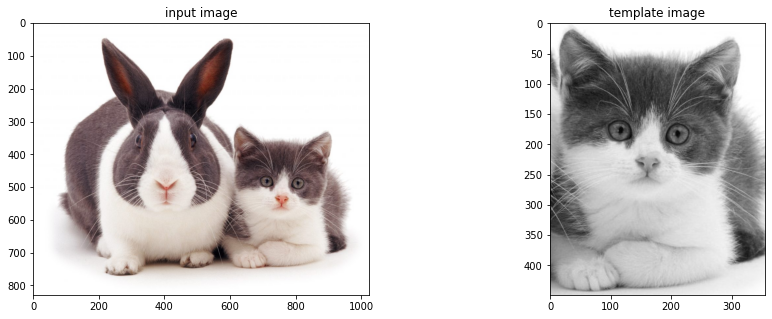

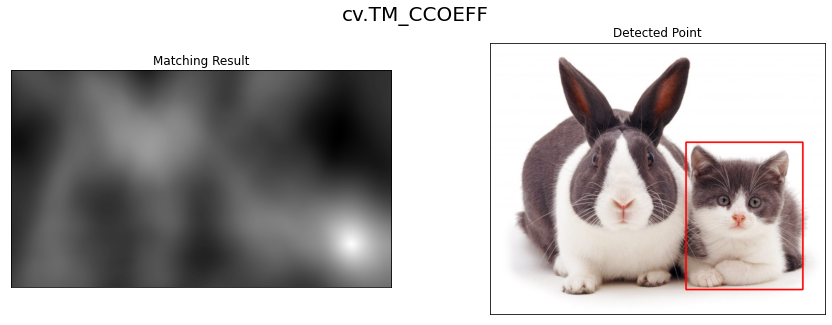

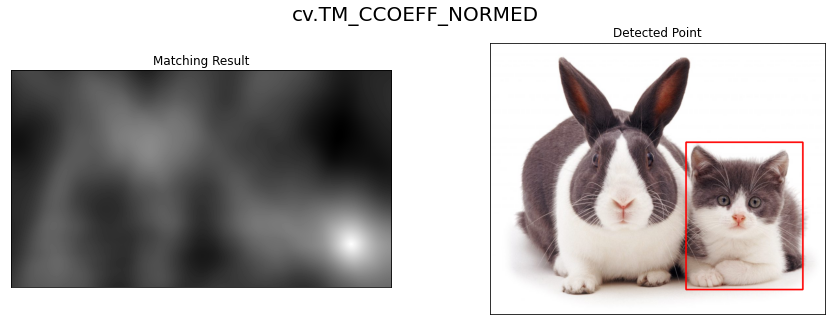

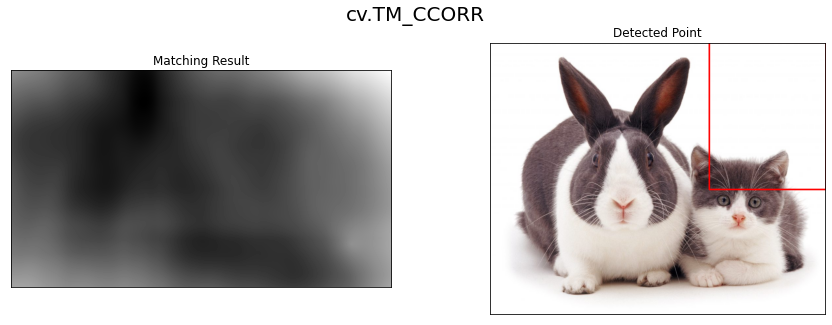

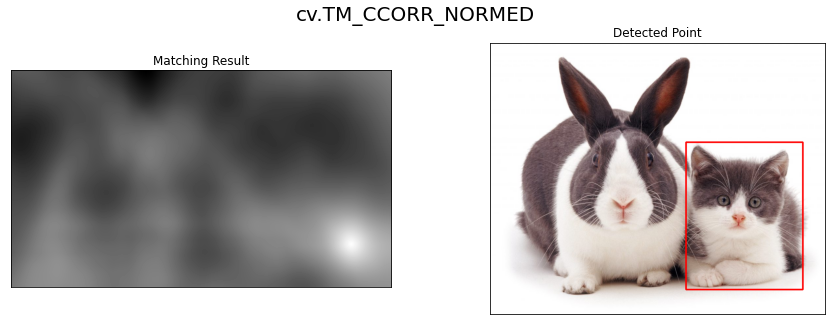

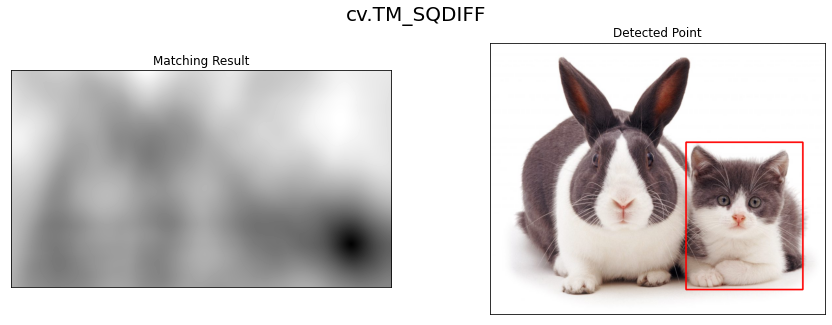

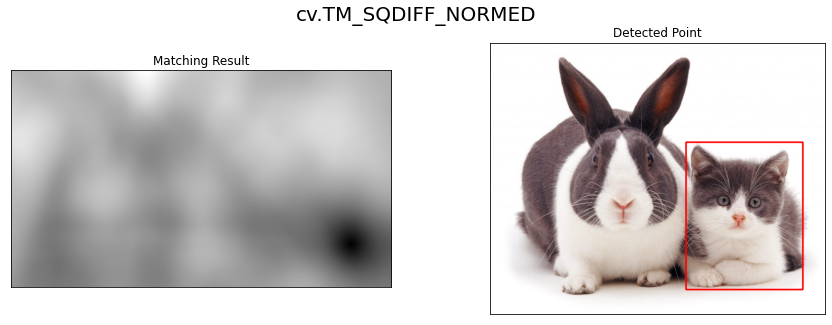

In [4]:
# NO 2
img = cv.imread('/content/drive/MyDrive/PCVK/Week 11/cats_and_bunnies.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = img.copy()
template = cv.imread('/content/drive/MyDrive/PCVK/Week 11/cat2_templatejpg.jpg',0)
w, h = template.shape[::-1]

f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255),3)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

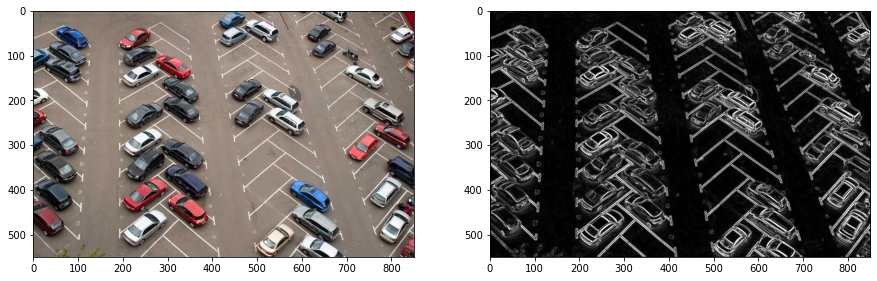

In [5]:
# Nomor3 a (Sobel Edge Detection )
img0 = cv.imread('/content/drive/MyDrive/PCVK/Week 11/parking-lot-cars.jpg') 

# converting to gray scale
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

# remove noise
img = cv.GaussianBlur(gray,(3,3),0)

# obtaining a horizontal and vertical Sobel filtering of the image
img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# image with both horizontal and vertical Sobel kernels applied
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))

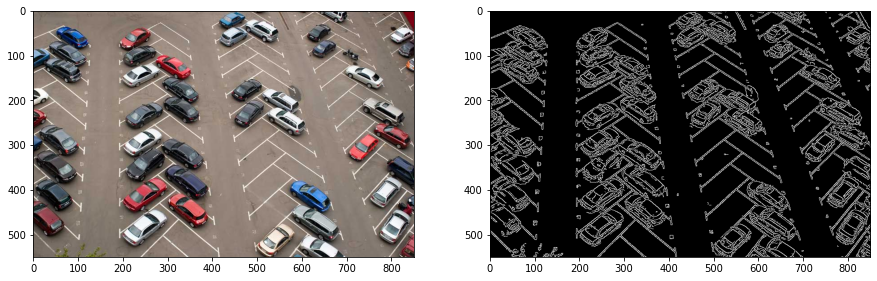

In [6]:
#Nomor3 b (Canny Edge Detection )
img = cv.imread('/content/drive/MyDrive/PCVK/Week 11/parking-lot-cars.jpg')
edges = cv.Canny(img,100,200)
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
plt.show()

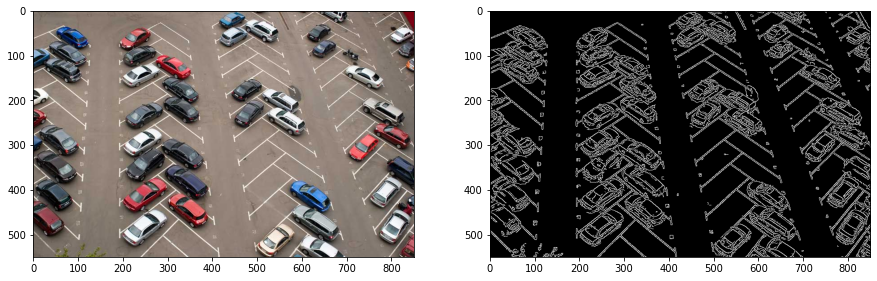

In [7]:
#Nomor3 c (Laplacian Edge Detection )
image_original = cv.imread('/content/drive/MyDrive/PCVK/Week 11/parking-lot-cars.jpg', cv.IMREAD_COLOR)
# remove noise
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)
# Reduce noise in image
img = cv.GaussianBlur(image_gray,(3,3),0)
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)
# converting back to uint8
filtered_image = cv.convertScaleAbs(filtered_image)
# Plot outputs
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(image_original, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(image_original, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
axarr[1].imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))